## test the representation ability of neural network

epoch :  1
epoch :  2
epoch :  3
epoch :  4
epoch :  5
epoch :  6
epoch :  7
epoch :  8
epoch :  9
epoch :  10
epoch :  11
epoch :  12
epoch :  13
epoch :  14
epoch :  15
epoch :  16
epoch :  17
epoch :  18
epoch :  19
epoch :  20
epoch :  21
epoch :  22
epoch :  23
epoch :  24
epoch :  25
epoch :  26
epoch :  27
epoch :  28
epoch :  29
epoch :  30
epoch :  31
epoch :  32
epoch :  33
epoch :  34
epoch :  35
epoch :  36
epoch :  37
epoch :  38
epoch :  39
epoch :  40
epoch :  41
epoch :  42
epoch :  43
epoch :  44
epoch :  45
epoch :  46
epoch :  47
epoch :  48
epoch :  49
epoch :  50
epoch :  51
epoch :  52
epoch :  53
epoch :  54
epoch :  55
epoch :  56
epoch :  57
epoch :  58
epoch :  59
epoch :  60
epoch :  61
epoch :  62
epoch :  63
epoch :  64
epoch :  65
epoch :  66
epoch :  67
epoch :  68
epoch :  69
epoch :  70
epoch :  71
epoch :  72
epoch :  73
epoch :  74
epoch :  75
epoch :  76
epoch :  77
epoch :  78
epoch :  79
epoch :  80
epoch :  81
epoch :  82
epoch :  83
epoch :  84
e

epoch :  642
epoch :  643
epoch :  644
epoch :  645
epoch :  646
epoch :  647
epoch :  648
epoch :  649
epoch :  650
epoch :  651
epoch :  652
epoch :  653
epoch :  654
epoch :  655
epoch :  656
epoch :  657
epoch :  658
epoch :  659
epoch :  660
epoch :  661
epoch :  662
epoch :  663
epoch :  664
epoch :  665
epoch :  666
epoch :  667
epoch :  668
epoch :  669
epoch :  670
epoch :  671
epoch :  672
epoch :  673
epoch :  674
epoch :  675
epoch :  676
epoch :  677
epoch :  678
epoch :  679
epoch :  680
epoch :  681
epoch :  682
epoch :  683
epoch :  684
epoch :  685
epoch :  686
epoch :  687
epoch :  688
epoch :  689
epoch :  690
epoch :  691
epoch :  692
epoch :  693
epoch :  694
epoch :  695
epoch :  696
epoch :  697
epoch :  698
epoch :  699
epoch :  700
epoch :  701
epoch :  702
epoch :  703
epoch :  704
epoch :  705
epoch :  706
epoch :  707
epoch :  708
epoch :  709
epoch :  710
epoch :  711
epoch :  712
epoch :  713
epoch :  714
epoch :  715
epoch :  716
epoch :  717
epoch :  718

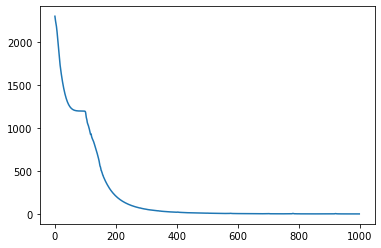

In [31]:
import torch
import torch.nn as nn
import numpy as np
from torch import optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

class basic_model(nn.Module):
    
    def __init__(self, neck_len):
        super(basic_model, self).__init__()
        
        self.fc1 = nn.Linear(1,neck_len)
        
        self.rl1 = nn.Tanh()
        
        self.fc2 = nn.Linear(neck_len, neck_len)
        
        self.rl2 = nn.Tanh()
        
        self.fc3 = nn.Linear(neck_len,1)
        
    def forward(self, x):
        
        out = self.rl1(self.fc1(x))
        
        out = self.rl2(self.fc2(out))
        
        out = self.fc3(out)
        
        return out
    
    
SAMPLE_AMOUNT = 10000
NECK_LEN = 10
ADAM_LR = 0.05
EPOCHS = 1000

INPUT = np.zeros((SAMPLE_AMOUNT , 1))
OUTPUT = np.zeros((SAMPLE_AMOUNT , 1))
func = lambda x : x**2 + 3*x


data = np.random.uniform(-10,10,SAMPLE_AMOUNT)

output = np.array([func(x) for x in data])

INPUT = np.expand_dims(data,axis=1)

OUTPUT = np.expand_dims(output,axis=1)

train_dataset = TensorDataset(torch.Tensor(INPUT),torch.Tensor(OUTPUT))   
train_loader = DataLoader(train_dataset, shuffle=True, batch_size = SAMPLE_AMOUNT)

model = basic_model(neck_len=NECK_LEN)
optimizer = optim.Adam(model.parameters(), lr = ADAM_LR)
criterion = nn.MSELoss()
training_losses = []

for epo in range(1,EPOCHS+1):
    print("epoch : ",epo)
    for step, (IN, TEST) in enumerate(train_loader):
        OUT = model(IN)
        loss = criterion(OUT,TEST)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        training_losses.append(loss.detach().item())

plt.plot(training_losses)   

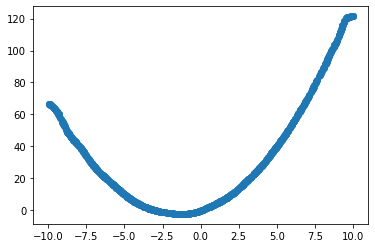

In [37]:
X = np.random.uniform(-10,10,1000)
Y = model(torch.Tensor(np.expand_dims(X,axis=1))).detach().numpy().squeeze()
plt.scatter(X,Y)

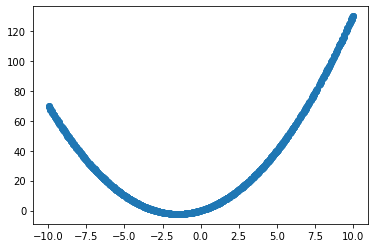

In [38]:
Z = np.array([func(x) for x in X])
plt.scatter(X,Z)